Dataset downloaded and unzipped successfully!
Dataset loaded. Shape: (41188, 21)
Encoded column: job
Encoded column: marital
Encoded column: education
Encoded column: default
Encoded column: housing
Encoded column: loan
Encoded column: contact
Encoded column: month
Encoded column: day_of_week
Encoded column: poutcome


/tmp/ipython-input-4229529328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot['y'], ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-4229529328.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_plot['job'], ax=axes[0, 2], palette='pastel', order=df_plot['job'].value_counts().index)
/tmp/ipython-input-4229529328.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_rate.values, y=marital_rate.index, ax=axes[0, 3], palette='mako')
/tmp/ipython-input-4229529328.py:90: FutureWarning: 

Passing `palette` wi


Data split into training (32950 samples) and testing (8238 samples).

Random Forest model training complete.

--- Model Evaluation ---
Accuracy: 0.9204

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.53      0.60       928

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



/tmp/ipython-input-4229529328.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, ax=axes[1, 3], palette='magma')


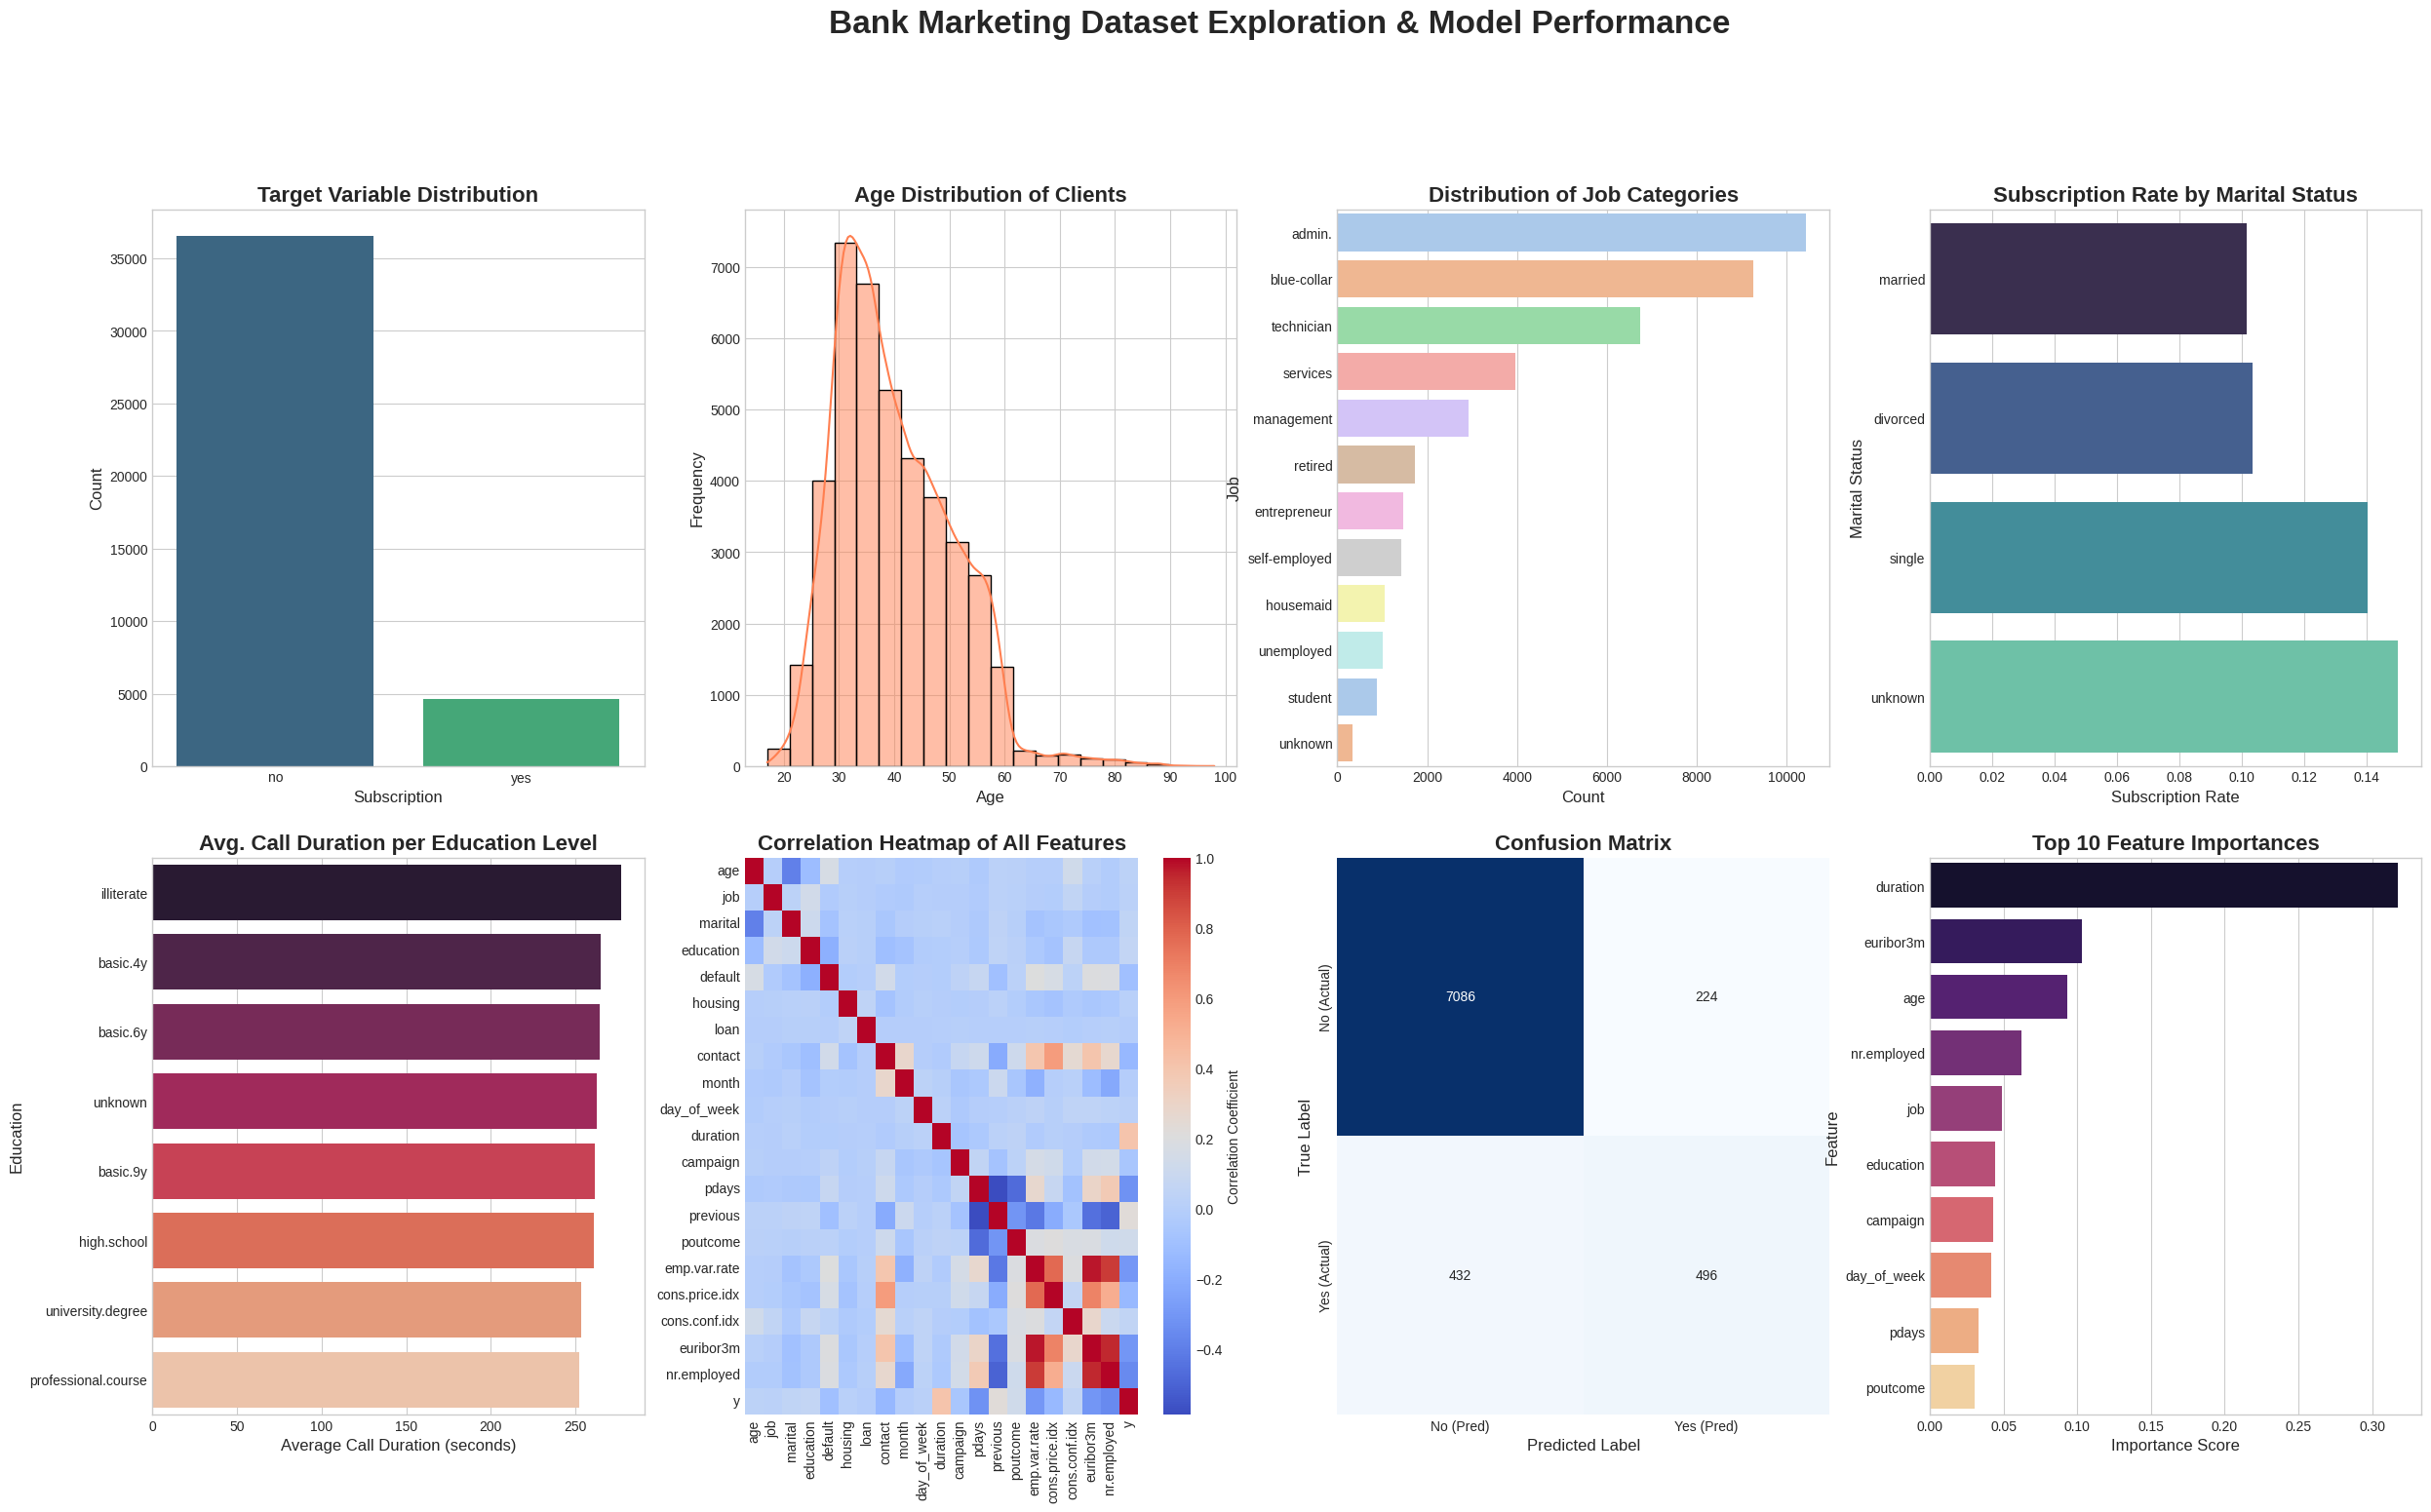

In [1]:
# ------------------- Import Libraries -------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# For downloading the dataset from a URL
import zipfile, requests, io

# ------------------- Load Dataset from UCI -------------------
# The URL for the bank-additional dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

print("Downloading dataset from UCI repository...")
try:
    # Make a request to the URL to get the zip file content
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    # Extract the contents into the current directory
    z.extractall()
    print("Dataset downloaded and unzipped successfully!")
except Exception as e:
    print(f"Error downloading or unzipping the dataset: {e}")
    # Exit gracefully if data download fails
    exit()

# Load the dataset (bank-additional-full.csv)
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")
print(f"Dataset loaded. Shape: {df.shape}")

# Create a copy for visualizations that require original categorical labels
df_plot = df.copy()

# ------------------- Data Preprocessing -------------------
# Map the target variable 'y' to 0 and 1
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Encode all other categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded column: {col}")

# Features and target
X = df.drop("y", axis=1)
y = df["y"]

# ------------------- Visualizations (8 Graphs) -------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'

# Create a figure with a 2x4 grid of subplots for all 8 graphs
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
fig.suptitle('Bank Marketing Dataset Exploration & Model Performance', fontsize=24, fontweight='bold', y=1.02)
plt.tight_layout(pad=5.0)

# --- Graph 1: Target Variable Distribution ---
sns.countplot(x=df_plot['y'], ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Target Variable Distribution", fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel("Subscription", fontsize=12)
axes[0, 0].set_ylabel("Count", fontsize=12)

# --- Graph 2: Age Distribution of Clients ---
sns.histplot(x=df_plot['age'], ax=axes[0, 1], color='coral', kde=True, bins=20)
axes[0, 1].set_title("Age Distribution of Clients", fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel("Age", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=12)

# --- Graph 3: Job Category Counts ---
sns.countplot(y=df_plot['job'], ax=axes[0, 2], palette='pastel', order=df_plot['job'].value_counts().index)
axes[0, 2].set_title("Distribution of Job Categories", fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel("Count", fontsize=12)
axes[0, 2].set_ylabel("Job", fontsize=12)

# --- Graph 4: Subscription Rate by Marital Status ---
marital_rate = df_plot.groupby('marital')['y'].value_counts(normalize=True).unstack().loc[:, 'yes'].sort_values()
sns.barplot(x=marital_rate.values, y=marital_rate.index, ax=axes[0, 3], palette='mako')
axes[0, 3].set_title("Subscription Rate by Marital Status", fontsize=16, fontweight='bold')
axes[0, 3].set_xlabel("Subscription Rate", fontsize=12)
axes[0, 3].set_ylabel("Marital Status", fontsize=12)

# --- Graph 5: Average Call Duration per Education Level ---
education_duration = df_plot.groupby('education')['duration'].mean().sort_values(ascending=False)
sns.barplot(x=education_duration.values, y=education_duration.index, ax=axes[1, 0], palette='rocket')
axes[1, 0].set_title("Avg. Call Duration per Education Level", fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel("Average Call Duration (seconds)", fontsize=12)
axes[1, 0].set_ylabel("Education", fontsize=12)

# --- Graph 6: Correlation Heatmap ---
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', ax=axes[1, 1], cbar_kws={'label': 'Correlation Coefficient'})
axes[1, 1].set_title("Correlation Heatmap of All Features", fontsize=16, fontweight='bold')

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# ------------------- Model Training -------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nRandom Forest model training complete.")

# ------------------- Predictions & Evaluation for Plots ---
y_pred = model.predict(X_test)
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Graph 7: Confusion Matrix Heatmap ---
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 2], cbar=False,
            xticklabels=['No (Pred)', 'Yes (Pred)'], yticklabels=['No (Actual)', 'Yes (Actual)'])
axes[1, 2].set_title("Confusion Matrix", fontsize=16, fontweight='bold')
axes[1, 2].set_xlabel("Predicted Label", fontsize=12)
axes[1, 2].set_ylabel("True Label", fontsize=12)

# --- Graph 8: Top 10 Feature Importances ---
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)
sns.barplot(x=importances, y=importances.index, ax=axes[1, 3], palette='magma')
axes[1, 3].set_title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
axes[1, 3].set_xlabel("Importance Score", fontsize=12)
axes[1, 3].set_ylabel("Feature", fontsize=12)

# Show all plots
plt.show()